![alt text](https://drive.google.com/uc?id=1zJX7y-J2jhIL17Lh7OroOZvrlblI0u1s)

![alt text](https://drive.google.com/uc?id=1L03HfNPXpLdLlKHk_I6FIj_ahPCuPL0S)

![alt text](https://drive.google.com/uc?id=1i-OPyUph2PGuuZ5FtN0hGX3BkEXCAQNM)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

## IMPORT LIBRARIES AND DATASETS

## IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [8]:
import os
path = r'C:\Users\Dael\Desktop\data'
cfile = 'Marketing_data.csv'
fullpath = os.path.join(path, cfile)

credit_card_df = pd.read_csv(fullpath)
credit_card_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Defining the meaning of each variable**

Definiendo significado de cada variable

* CUSTID: Identificación del titular de la tarjeta de crédito
* BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
* BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
* PURCHASES: Cantidad de compras realizadas desde la cuenta
* ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
* INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
* CASH_ADVANCE: Anticipo otorgado al usuario
* PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
* PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
* ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
* PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
* CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
* CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
* PURCHASES_TRX: número de transacciones de compras realizadas
* CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
* PAYMENTS: Número de pagos realizados por el usuario
* MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
* PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
* TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [9]:
credit_card_df.shape

(8950, 18)

In [10]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
credit_card_df.describe()
# El balance medio es $1564 
# La frecuencia del balance se actualiza con mucha frecuencia, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**checking outliers in ONE OFF PURCHASES**

revisando valores atipicos en ONE OFF PURCHASES

In [13]:
# quien ha hecho una compra de $40761
credit_card_df[credit_card_df['ONEOFF_PURCHASES'] == 40761.25]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


**cheking who is the customer with the highest CASH ADVANCE request**

revisando quien es el cliente que ha solictado un anticipo (CASH ADVANCE) mas alto

In [18]:
# revisar  quien pago por anticipado $47137!
# Este cliente hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta

credit_card_df[credit_card_df['CASH_ADVANCE'] > 47137.2]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## DATASET DISPLAY

##  VISUALIZACIÓN DEL DATASET

**cheking null data**

revisando datos nulos

In [19]:
credit_card_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [21]:
# revisando solo para la columna BALANCE
np.mean(credit_card_df['BALANCE'].isnull()) 

0.0

**view percentage of missing data for each column**

ver poncentaje de datos faltantes para cada columna

In [23]:
# contando el numero de valores nulos
credit_card_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [22]:
for col in credit_card_df.columns:
    missing_data = np.mean(credit_card_df[col].isnull())
    print('{} - {} %'.format(col, missing_data*100))

CUST_ID - 0.0 %
BALANCE - 0.0 %
BALANCE_FREQUENCY - 0.0 %
PURCHASES - 0.0 %
ONEOFF_PURCHASES - 0.0 %
INSTALLMENTS_PURCHASES - 0.0 %
CASH_ADVANCE - 0.0 %
PURCHASES_FREQUENCY - 0.0 %
ONEOFF_PURCHASES_FREQUENCY - 0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY - 0.0 %
CASH_ADVANCE_FREQUENCY - 0.0 %
CASH_ADVANCE_TRX - 0.0 %
PURCHASES_TRX - 0.0 %
CREDIT_LIMIT - 0.0111731843575419 %
PAYMENTS - 0.0 %
MINIMUM_PAYMENTS - 3.4972067039106145 %
PRC_FULL_PAYMENT - 0.0 %
TENURE - 0.0 %


In [24]:
# fill in missing data with the average of the field 'MINIMUM_PAYMENT'. 
# rellenar datos faltantes con el promedio del campo 'MINIMUM_PAYMENT' 
credit_card_df.loc[(credit_card_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] 

3      NaN
45     NaN
47     NaN
54     NaN
55     NaN
        ..
8919   NaN
8929   NaN
8935   NaN
8944   NaN
8946   NaN
Name: MINIMUM_PAYMENTS, Length: 313, dtype: float64

In [25]:
credit_card_df.loc[(credit_card_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credit_card_df['MINIMUM_PAYMENTS'].mean()

In [26]:
# fill in the missing data with the average of the field 'CREDIT_LIMIT'. 
# rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT' 
credit_card_df.loc[(credit_card_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credit_card_df['CREDIT_LIMIT'].mean()

In [27]:
# checking that all missing data have been filled in
# revisando que todos los datos faltantes se hayan rellenado
for col in credit_card_df.columns:
    missing_data = np.mean(credit_card_df[col].isnull())
    print('{} - {} %'.format(col, missing_data*100))


CUST_ID - 0.0 %
BALANCE - 0.0 %
BALANCE_FREQUENCY - 0.0 %
PURCHASES - 0.0 %
ONEOFF_PURCHASES - 0.0 %
INSTALLMENTS_PURCHASES - 0.0 %
CASH_ADVANCE - 0.0 %
PURCHASES_FREQUENCY - 0.0 %
ONEOFF_PURCHASES_FREQUENCY - 0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY - 0.0 %
CASH_ADVANCE_FREQUENCY - 0.0 %
CASH_ADVANCE_TRX - 0.0 %
PURCHASES_TRX - 0.0 %
CREDIT_LIMIT - 0.0 %
PAYMENTS - 0.0 %
MINIMUM_PAYMENTS - 0.0 %
PRC_FULL_PAYMENT - 0.0 %
TENURE - 0.0 %


**checking for duplicate data**

verificando si hay datos duplicados

In [28]:
credit_card_df.duplicated().sum()

0

In [29]:
# elimianr la columna Customer ID ya que no nos sirve para nada 
credit_card_df.drop(['CUST_ID'], axis=1, inplace=True)

In [30]:
credit_card_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [41]:
n = len(credit_card_df.columns)
n

17

C:\Users\Dael\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dael\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dael\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

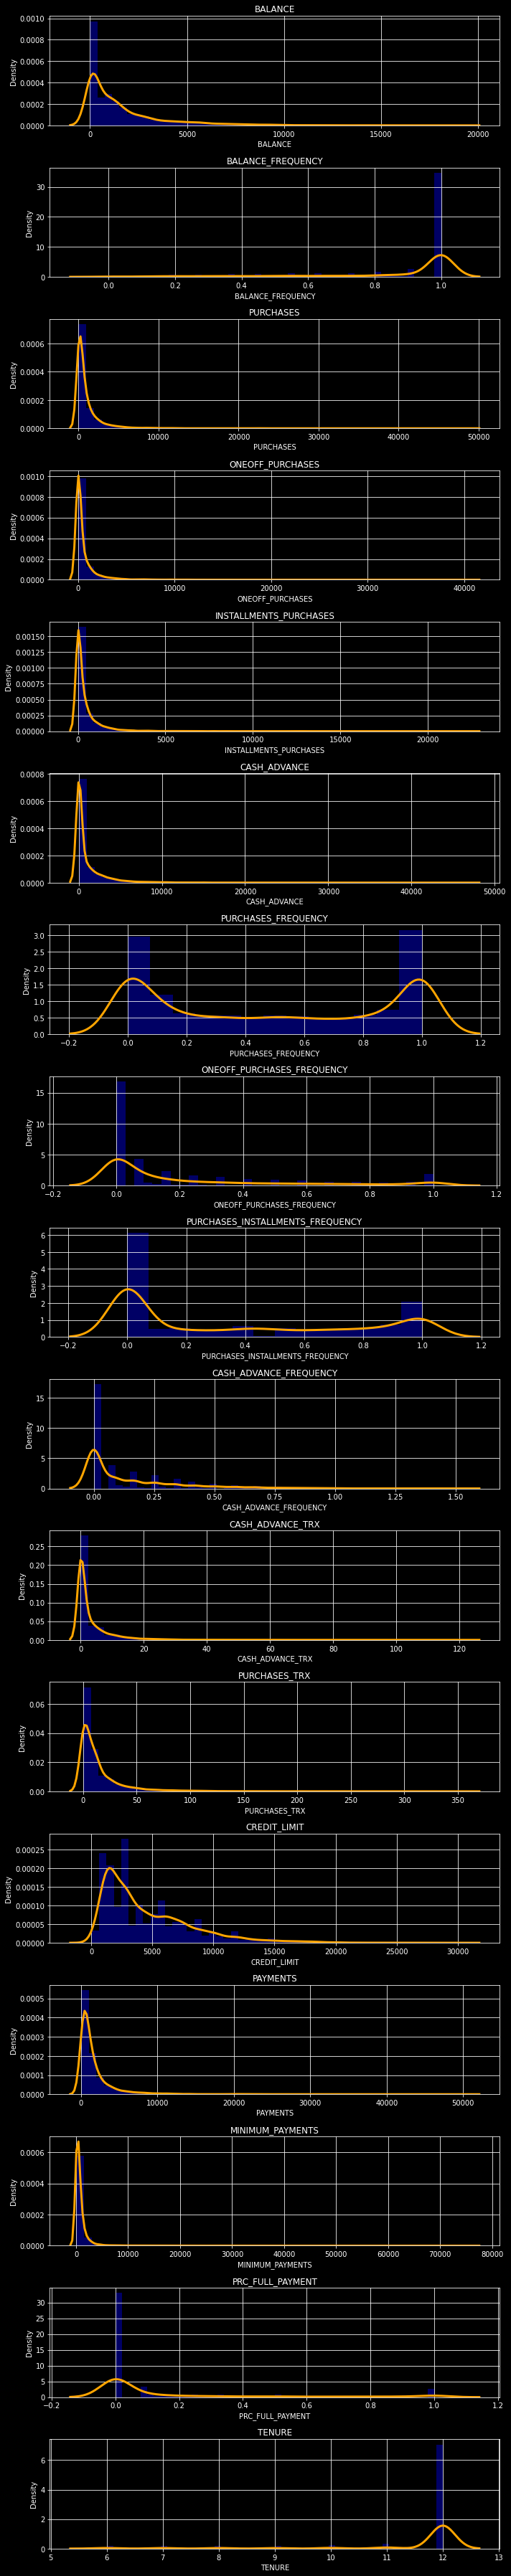

In [57]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE muestra la densidad de una probabilidad para diferentes valores de una variable continua. 


# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio

plt.figure(figsize=(10,50)) 
for i in range(n):
    plt.subplot(n, 1, i+1) #filas, columna, grafico_1 
    sns.distplot(credit_card_df[credit_card_df.columns[i]], kde_kws={'color': 'orange', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})
    plt.title(credit_card_df.columns[i])
    plt.grid()
    plt.style.use('dark_background')
    
plt.tight_layout()

**checking correlations**

revisando las correlaciones

In [58]:
correlations = credit_card_df.corr()

<AxesSubplot:>

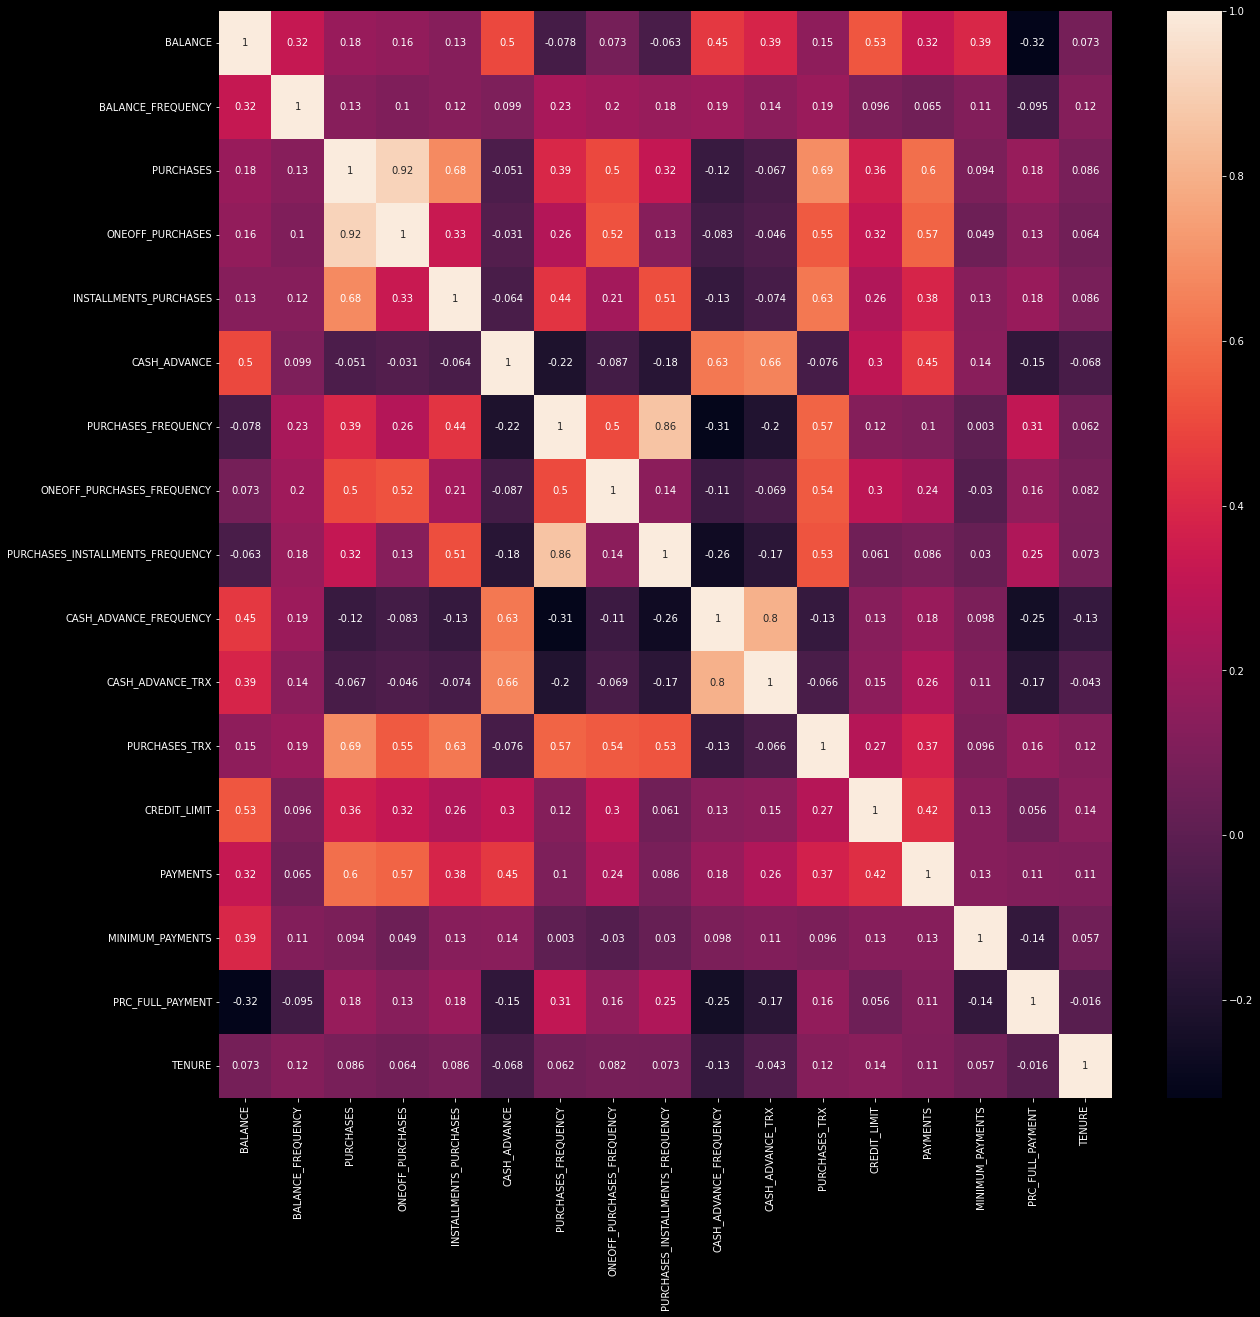

In [60]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True) 
# 'PURCHASES' tienen una alta correlación con ONE-OFF PURCHASES, 'INSTALLMENT PURCHASES, PURCHASE TRANSACTIONS, CREDIT LIMIT y PAYMENTS. 
# Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'


### FINDING THE OPTIMAL NUMBER OF CLUSTERS "K"  USING THE ELBOW METHOD

### ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS "K" UTILIZANDO EL MÉTODO DEL CODO

**scale the dataset first**

escalar primero el dataset de las columnas con valores muy pequeños

In [62]:

scaler = StandardScaler() # cada columna es como una distribución normal
credit_card_df_scaled = scaler.fit_transform(credit_card_df)

In [63]:
credit_card_df_scaled.shape

(8950, 17)

In [64]:
credit_card_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

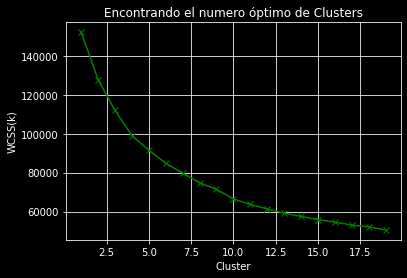

In [66]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    k_means = KMeans(n_clusters= i)
    k_means.fit(credit_card_df_scaled)
    scores_1.append(k_means.inertia_) # WCSS
    
plt.plot(range_values, scores_1, 'gx-')
plt.title('Encontrando el numero óptimo de Clusters')
plt.xlabel('Cluster')
plt.ylabel('WCSS(k)')
plt.grid()
plt.show()

# Con el gráfico se puede ver que en 4 clusters es donde se forma el codo de la curva.
# Sin embargo, los valores no se reducen a una forma lineal hasta el 8vo cluster. 
# En este caso eligiré un número de clusters igual a 8. Es decri 8 segmentos

### APPLYING THE METHOD OF K-MEANS

### APLICANDO EL MÉTODO DE K-MEANS PARA SEGMENTAR EL MERCADO

In [67]:
k_means

KMeans(n_clusters=19)

In [68]:
k_means =  KMeans(8)
k_means.fit(credit_card_df_scaled)
labels = k_means.labels_
labels  # etiquetas en cada numemro de cluster

array([5, 2, 1, ..., 3, 3, 3])

In [69]:
# 8 centroides  
k_means.cluster_centers_.shape 

(8, 17)

In [70]:
cluster_centers = pd.DataFrame(data= k_means.cluster_centers_, columns= [credit_card_df.columns])
cluster_centers

# cada fila representa un centroide

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701009,-2.138136,-0.310175,-0.234684,-0.302132,-0.322644,-0.553774,-0.441224,-0.439490,-0.521764,-0.376480,-0.419036,-0.174850,-0.201495,-0.257001,0.283165,0.201504
1,-0.132457,0.399285,0.538811,0.666753,0.048881,-0.330433,0.984779,1.905436,0.178276,-0.414453,-0.331372,0.620407,0.440718,0.147916,-0.158170,0.449358,0.268279
2,1.675209,0.392426,-0.223605,-0.159893,-0.235027,2.000547,-0.482010,-0.212103,-0.422351,1.913861,1.917906,-0.272466,1.016545,0.811141,0.549555,-0.392117,0.070464
3,-0.334592,-0.350524,-0.288489,-0.214652,-0.287412,0.067364,-0.204978,-0.287181,-0.226363,0.308493,0.000348,-0.388193,-0.562451,-0.393054,-0.208753,0.012516,-3.199775
4,-0.362431,0.333024,-0.033257,-0.242671,0.367002,-0.363214,0.996573,-0.383846,1.209213,-0.473160,-0.360153,0.191474,-0.261469,-0.215017,-0.030086,0.318633,0.255843
5,0.008638,0.404404,-0.355757,-0.240706,-0.398854,-0.097604,-0.847518,-0.391239,-0.751443,0.096732,-0.032793,-0.479948,-0.305914,-0.251761,-0.012843,-0.455204,0.275002
6,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
7,1.049288,0.467453,2.477237,1.825833,2.503104,-0.154476,1.162479,1.569183,1.266291,-0.277703,-0.144414,3.119965,1.291682,1.437631,0.558269,0.238852,0.337655


In [71]:
# Para entender mejor estos valores, aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns= [credit_card_df.columns])
cluster_centers

# Primer Cluster de Clientes (Transactors): 
# Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) 
# y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%

# Segundo Cluster de Clientes (revolvers):
# que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra,
# alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)

# Tercer Cluster de Clientes (VIP/Prime):
# límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto

# Cuarto Cluster de Clientes (low tenure):
# estos son clientes con baja antigüedad (7 años), saldo bajo


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.384576,0.370766,340.512122,202.909535,137.853474,302.271277,0.268094,0.070832,0.189773,0.030734,0.679628,4.294167,3858.275101,1149.836235,265.277702,0.236535,11.786982
1,1288.776217,0.971858,2154.381962,1699.111407,455.270556,285.937607,0.885590,0.770886,0.435289,0.052208,0.987455,30.130824,6097.963506,2161.345380,495.598128,0.285144,11.876344
2,5051.280927,0.970233,525.468702,327.048565,198.535934,5174.112253,0.296897,0.139183,0.196584,0.518127,16.337130,7.937358,8193.057569,4081.318579,2144.921309,0.039027,11.611617
3,868.050123,0.794235,386.843712,236.159280,151.164432,1120.136414,0.408083,0.116786,0.274475,0.196877,3.251200,5.060800,2448.023119,595.290996,377.716763,0.157375,7.235200
4,810.104815,0.956161,932.150950,189.652448,742.942920,217.194545,0.890323,0.087949,0.845010,0.040460,0.791045,19.469154,3543.119503,1110.691155,794.092124,0.246909,11.859701
5,1582.453973,0.973070,243.124184,192.914412,50.389336,774.190226,0.150201,0.085743,0.065795,0.154501,3.025036,2.780116,3381.410256,1004.319552,834.276543,0.020575,11.885341
6,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
7,3748.479097,0.988006,6295.859720,3622.946667,2674.593725,654.927090,0.956909,0.670576,0.867694,0.079573,2.263305,92.260504,9194.117647,5894.944496,2165.228773,0.223575,11.969188


In [72]:
labels.shape

(8950,)

In [73]:
labels.min()

0

In [74]:
labels.max()

7

In [75]:
# concatenar las etiquetas de los clusters con el dataset original 
credit_card_df_cluster = pd.concat([credit_card_df, pd.DataFrame({'cluster': labels})], axis = 1)
credit_card_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


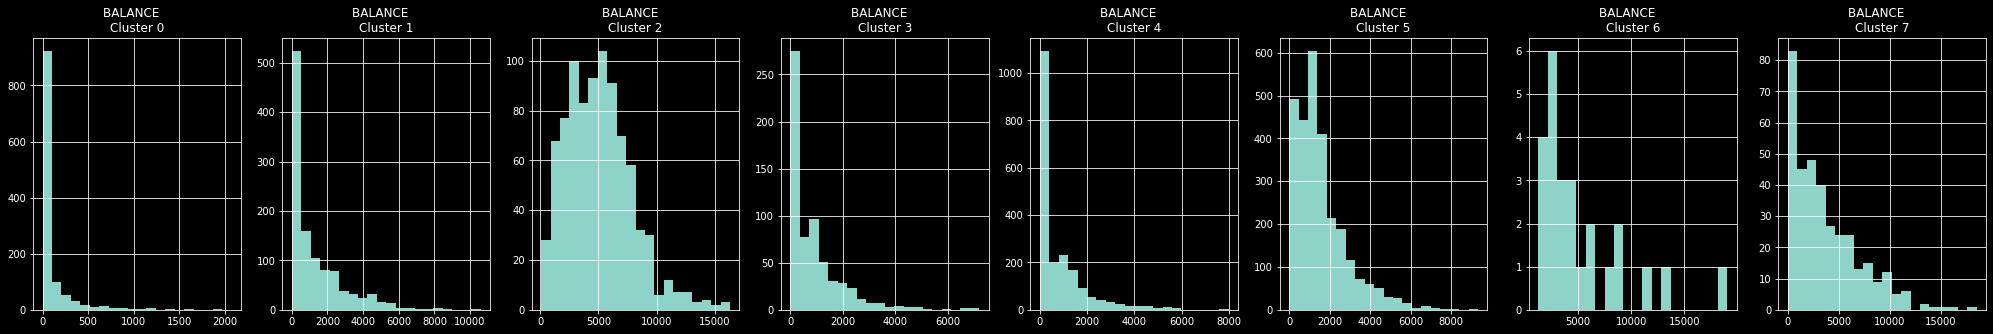

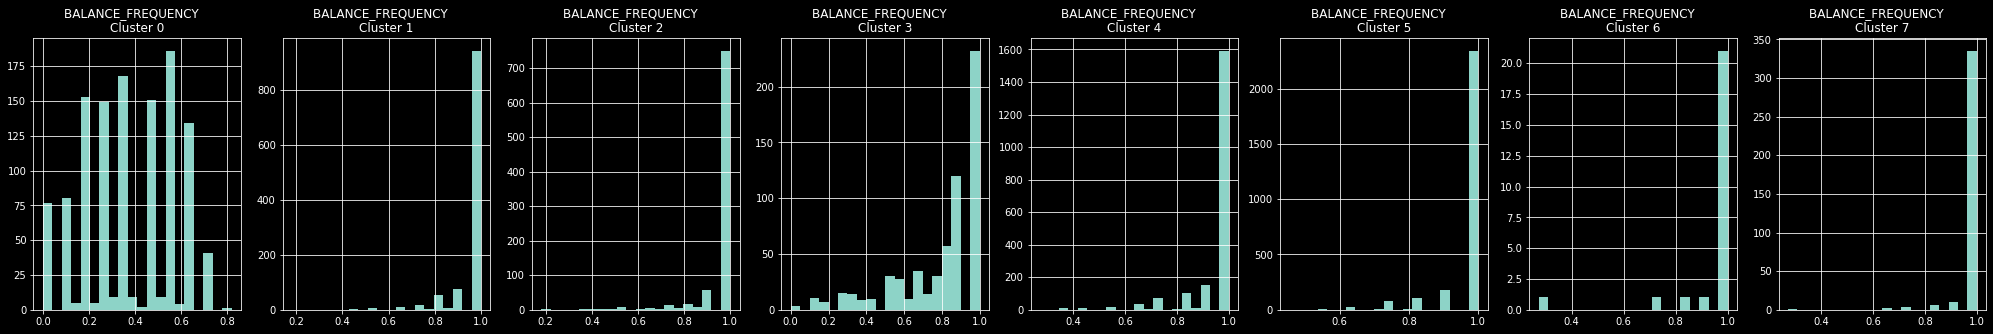

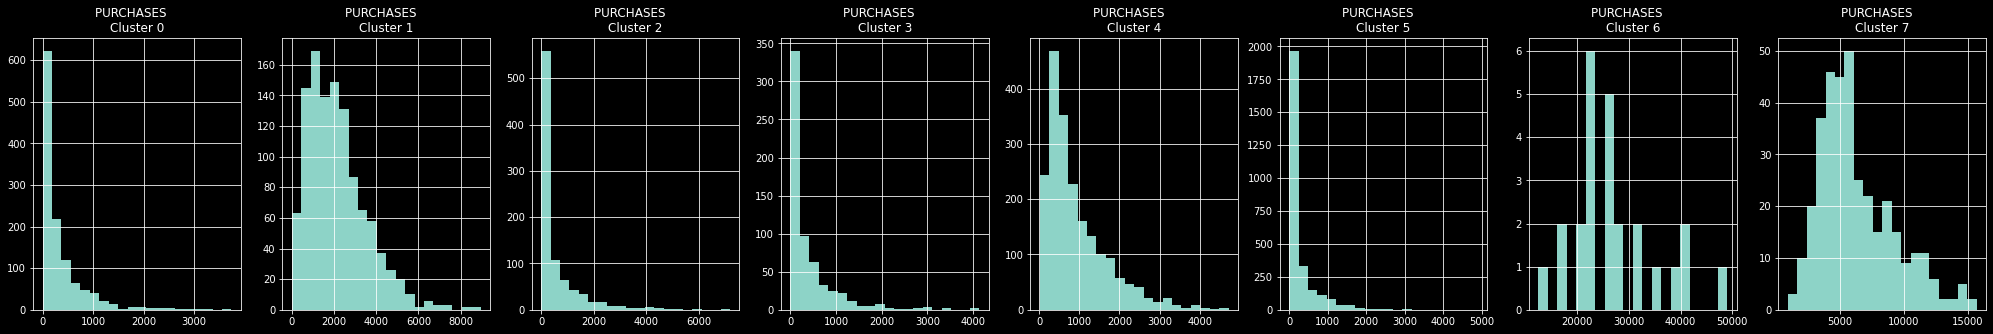

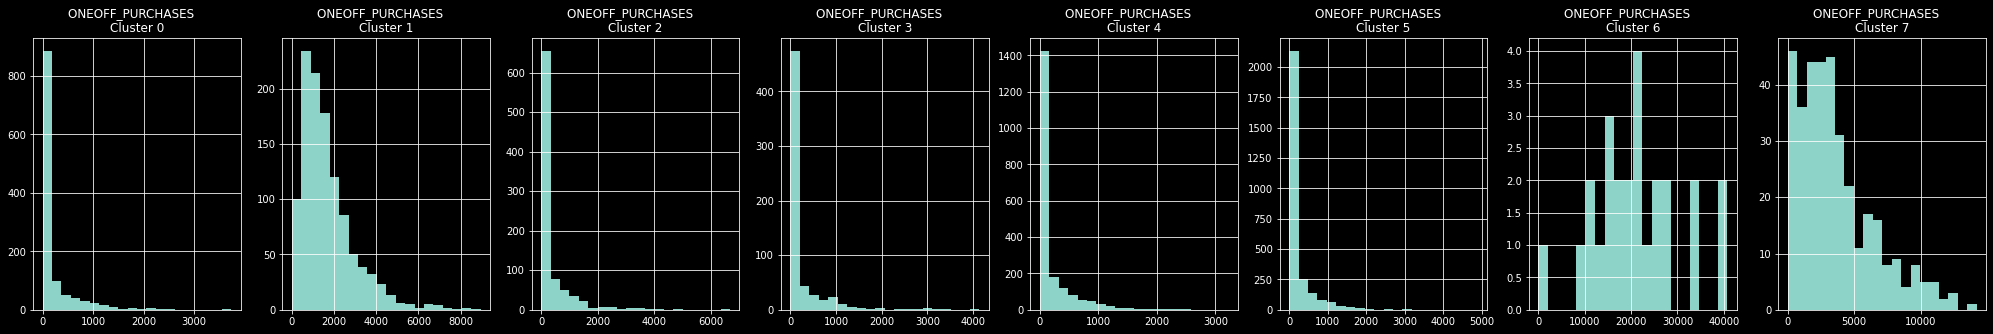

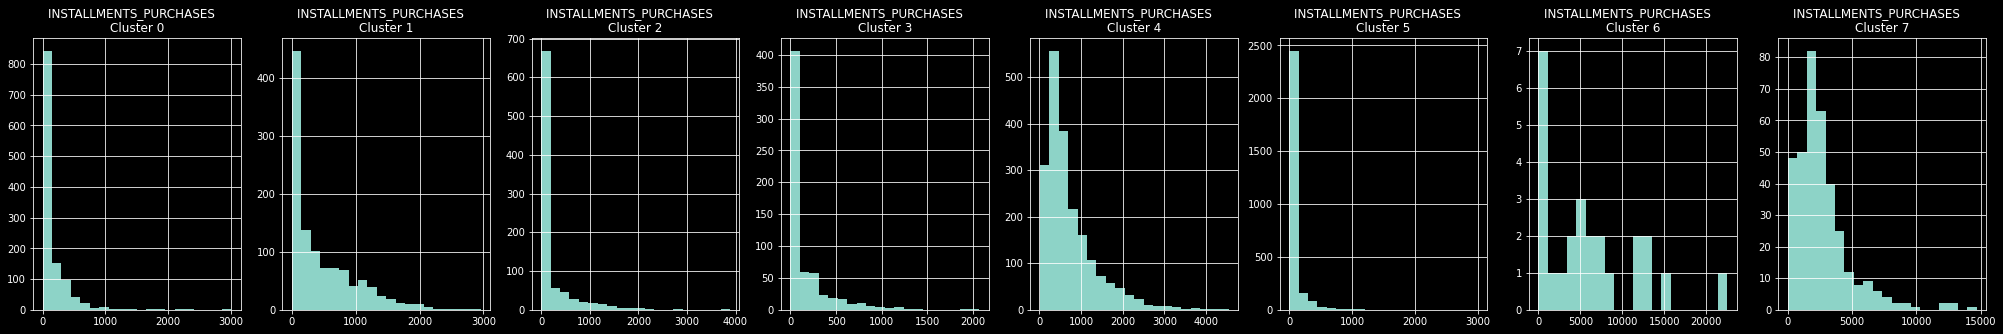

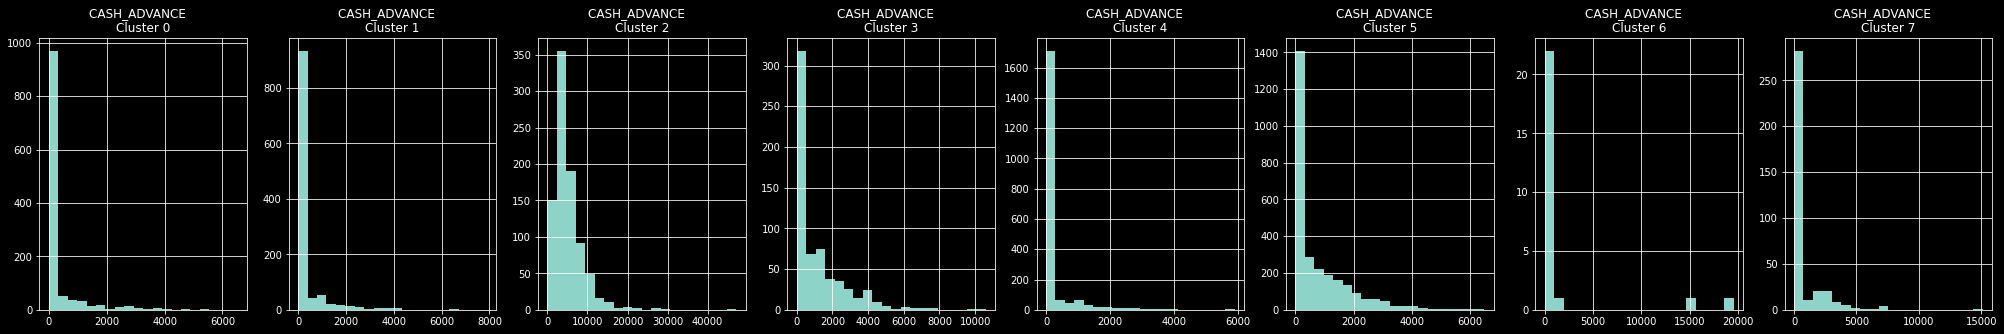

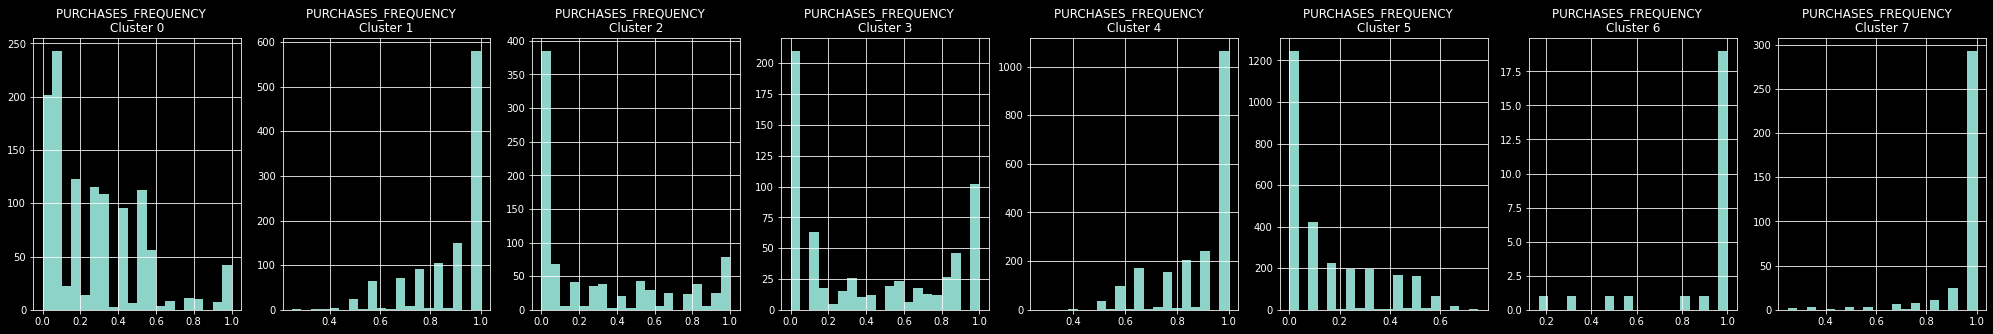

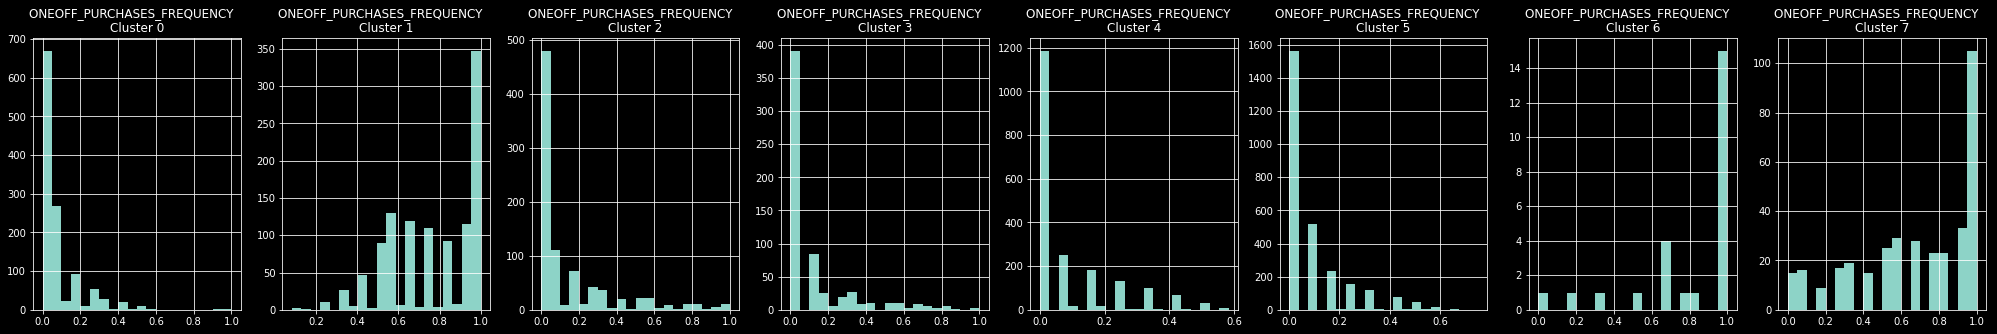

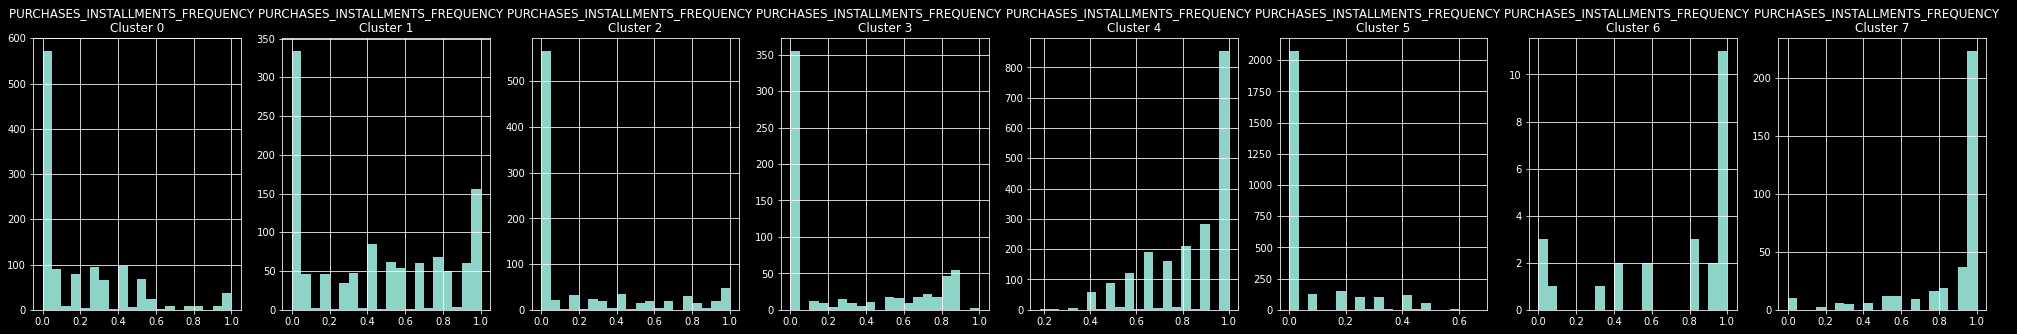

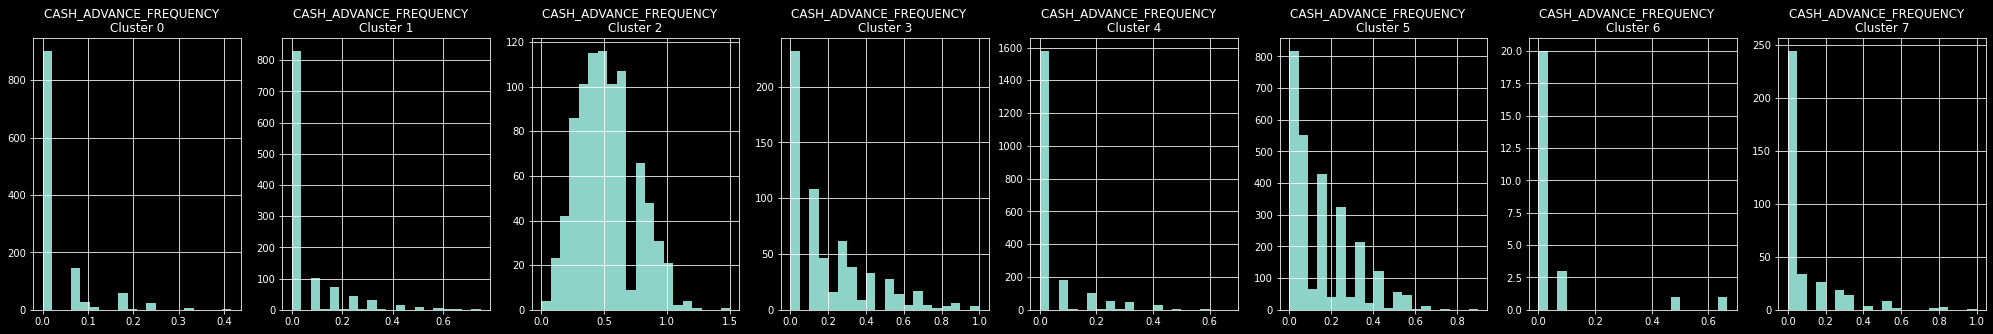

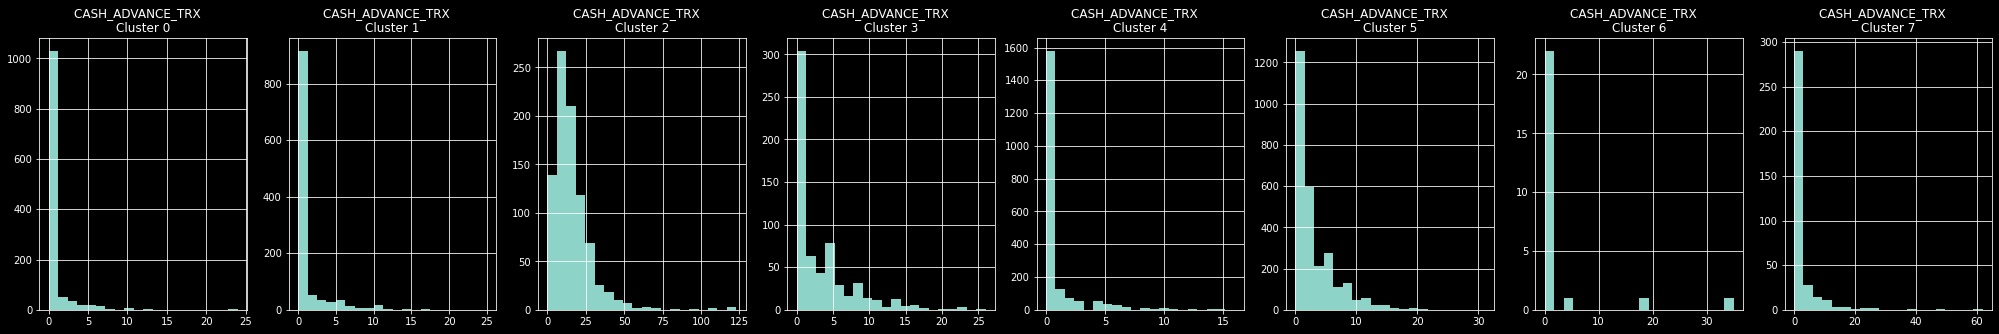

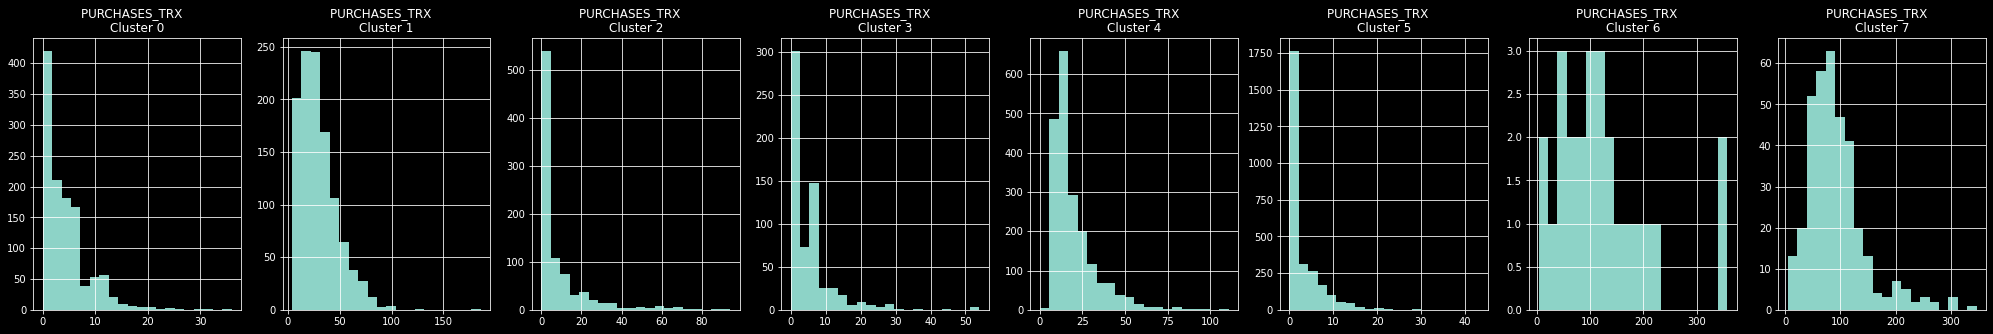

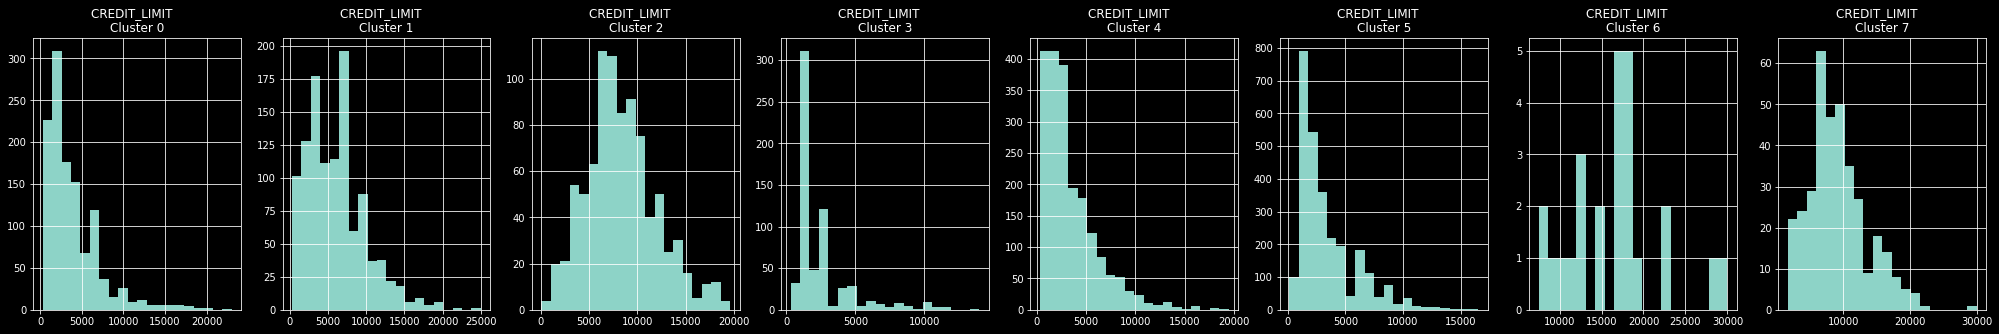

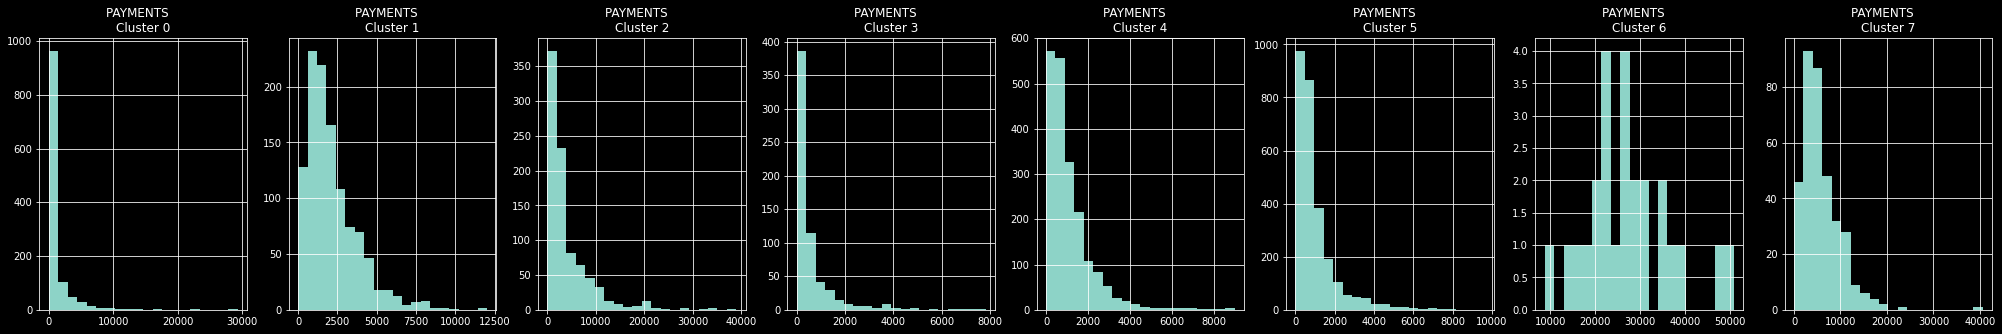

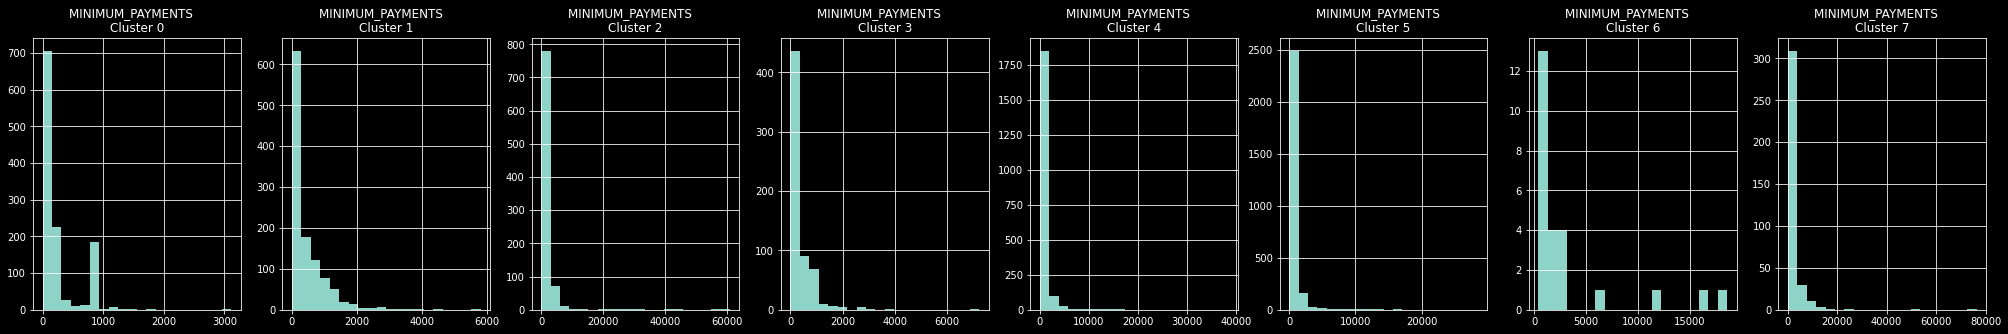

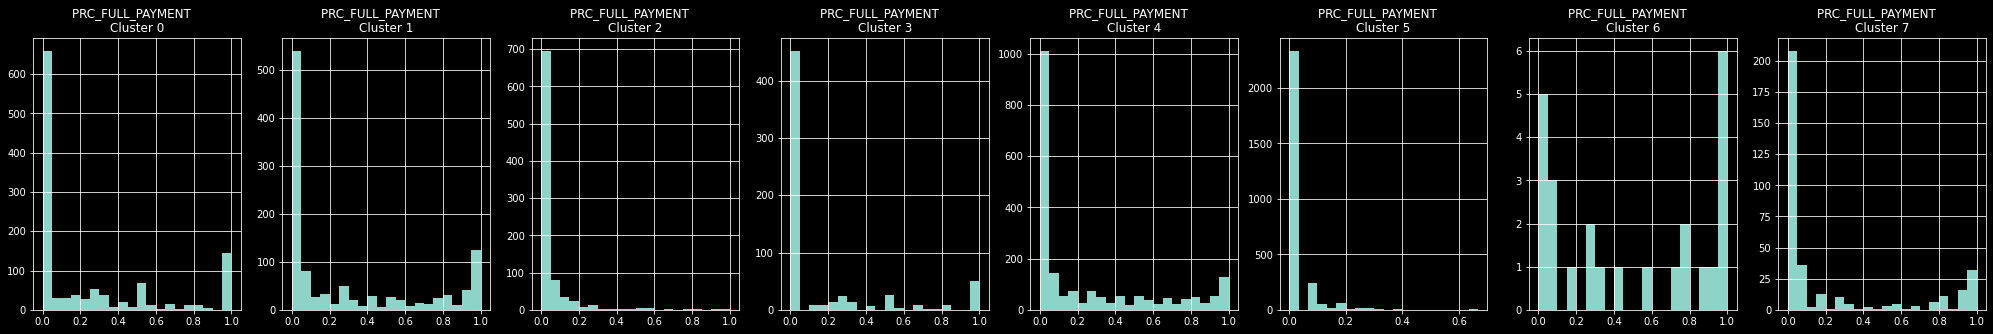

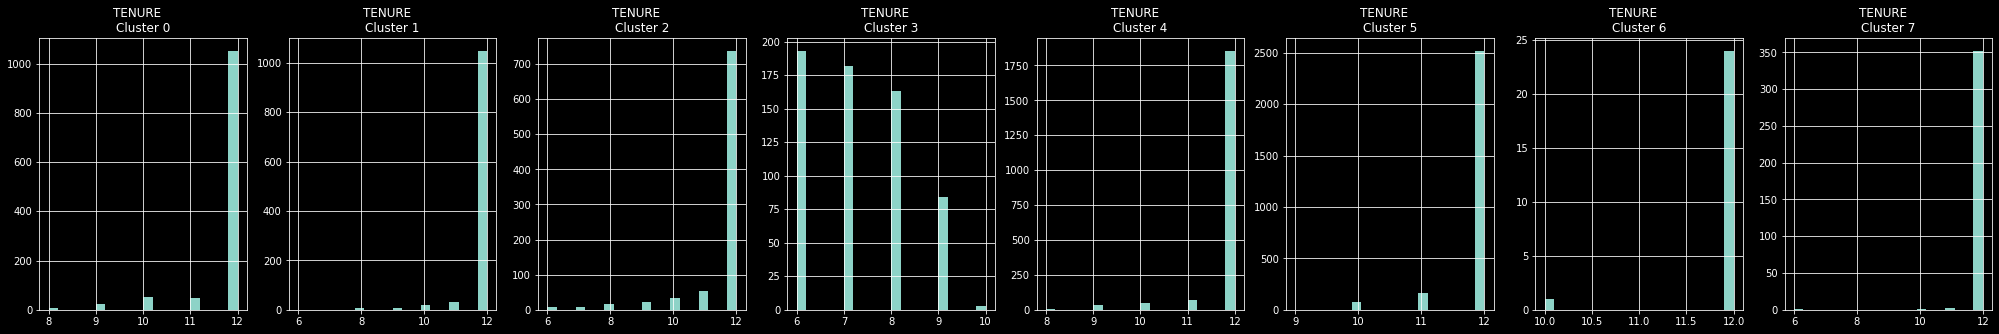

In [76]:
# Visualizar histogramas para cada cluster 
for i in credit_card_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = credit_card_df_cluster[credit_card_df_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{}   \nCluster {}'.format(i, j))
    plt.show()

### APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS 

### APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

In [77]:
# Obtener las componentes principales para 2 componentes
pca = PCA(n_components= 2)
principal_comp = pca.fit_transform(credit_card_df_scaled)
principal_comp

array([[-1.68222125, -1.07645567],
       [-1.13829748,  2.50646623],
       [ 0.96968787, -0.38350596],
       ...,
       [-0.92620391, -1.81078814],
       [-2.33655297, -0.6579714 ],
       [-0.55642024, -0.40045644]])

In [78]:
# dataframe con las dos componentes 
pca_df = pd.DataFrame(data= principal_comp, columns=['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-1.682221,-1.076456
1,-1.138297,2.506466
2,0.969688,-0.383506
3,-0.873630,0.043157
4,-1.599434,-0.688583
...,...,...
8945,-0.359629,-2.016146
8946,-0.564371,-1.639130
8947,-0.926204,-1.810788
8948,-2.336553,-0.657971


In [79]:
# Concatenar las etiquetas de los clusters con el dataframe de las componentes principales
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis= 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076456,5
1,-1.138297,2.506466,2
2,0.969688,-0.383506,1
3,-0.873630,0.043157,5
4,-1.599434,-0.688583,5


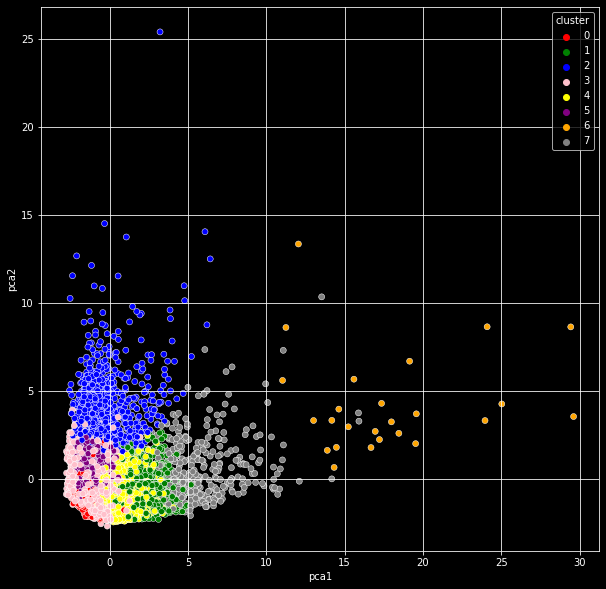

In [81]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data= pca_df, palette= ['red', 'green', 'blue', 'pink', 'yellow', 'purple', 'orange', 'gray'])
plt.grid()
plt.show()

---

### APPLY AUTOENCODERS (REDUCE THE DIMENSION OF THE DATA WITH AUTOENCODERS)

### APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS) 

**autoencoders work well if there are correlations between the input data and work poorly if all the input data are independent.**

los autoencoders funcionan bien si existen correlaciones entre los datos de entrada y funcionan mal si todos los datos de entrada son independientes.

In [82]:
!pip install tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
Using legacy 'setup.py install' for termcolor, since package 'wheel' is not installed.
    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'


In [83]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD


ImportError: cannot import name 'SGD' from 'keras.optimizers' (C:\Users\Dael\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers.py)

(8950, 17)

Epoch 1/25
70/70 [==============================] - 4s 57ms/step - loss: 0.4943
Epoch 2/25
70/70 [==============================] - 4s 57ms/step - loss: 0.2985
Epoch 3/25
70/70 [==============================] - 4s 56ms/step - loss: 0.2192
Epoch 4/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1879
Epoch 5/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1729
Epoch 6/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1595
Epoch 7/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1395
Epoch 8/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1300
Epoch 9/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1157
Epoch 10/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1067
Epoch 11/25
70/70 [==============================] - 4s 56ms/step - loss: 0.0907
Epoch 12/25
70/70 [==============================] - 4s 56ms/step - loss: 0.0884
Epoch 13/25
70/70 [==================

(8950, 10)

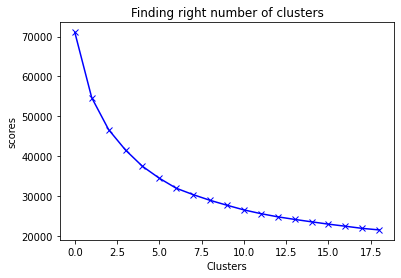

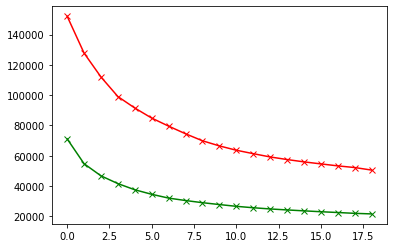

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


,pca1,pca2
0,-1.682221,-1.076451
1,-1.138299,2.506482
2,0.969680,-0.383501
3,-0.873630,0.043168
4,-1.599433,-0.688583


,pca1,pca2,cluster
0,-1.682221,-1.076451,3
1,-1.138299,2.506482,3
2,0.969680,-0.383501,3
3,-0.873630,0.043168,2
4,-1.599433,-0.688583,3


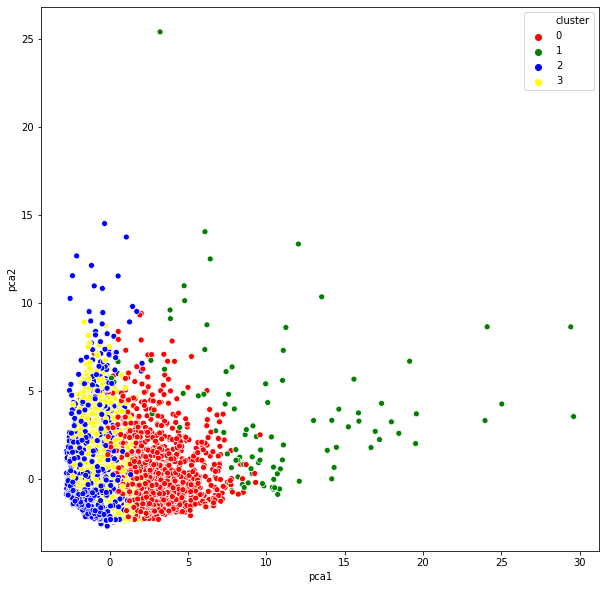